In [12]:
from __future__ import unicode_literals, print_function
import csv, os
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
%matplotlib inline

pol_data = list(csv.reader(open(r'E:\Programming\python\창회선배스터디\SSAbasedTrend\1-SO-SSAbasedTrend-InputSample.t.csv', 'r', encoding='cp949')))[1:]

pol_res = {}

def insert_label(result_dict, date, label):
    if label == 'POSITIVE': result_dict[date][0] += 1
    else: result_dict[date][1] += 1
    return result_dict

for date, label in pol_data:
    if date in pol_res.keys(): pol_res = insert_label(pol_res, date, label)
    else:
        pol_res[date] = [0, 0]
        pol_res = insert_label(pol_res, date, label)

date_lst = list(pol_res.keys())
sent_lst = list(pol_res.values())
pos_lst = []
neg_lst = []

for x in range(0,len(sent_lst)):
    pos_lst.append(sent_lst[x][0])

for y in range(0, len(sent_lst)):
    neg_lst.append(sent_lst[y][1])


# print(neg_lst)
# print(pos_lst)
# print(date_lst)
# print(sent_lst)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



           date  Positive  Negative
0    2015-04-16         1         0
1    2015-05-05         1         0
2    2015-06-07         1         0
3    2015-06-13         1         0
4    2015-06-14         2         0
..          ...       ...       ...
591  2017-09-21         3         0
592  2017-09-22         2         0
593  2017-09-23         2         0
594  2017-09-24         1         0
595  2017-09-27         1         0

[596 rows x 3 columns]
[['2015-04-16', 1, 0], ['2015-05-05', 1, 0], ['2015-06-07', 1, 0], ['2015-06-13', 1, 0], ['2015-06-14', 2, 0], ['2015-06-19', 1, 0], ['2015-06-20', 1, 0], ['2015-06-24', 1, 0], ['2015-06-26', 1, 0], ['2015-06-27', 1, 0], ['2015-06-30', 1, 0], ['2015-07-06', 1, 0], ['2015-07-07', 1, 0], ['2015-07-12', 1, 0], ['2015-07-13', 1, 0], ['2015-07-23', 1, 0], ['2015-07-29', 2, 0], ['2015-07-31', 1, 0], ['2015-08-01', 1, 0], ['2015-08-02', 1, 0], ['2015-08-05', 1, 0], ['2015-08-07', 2, 0], ['2015-08-09', 1, 0], ['2015-08-10', 1, 0], ['2015-08-13', 

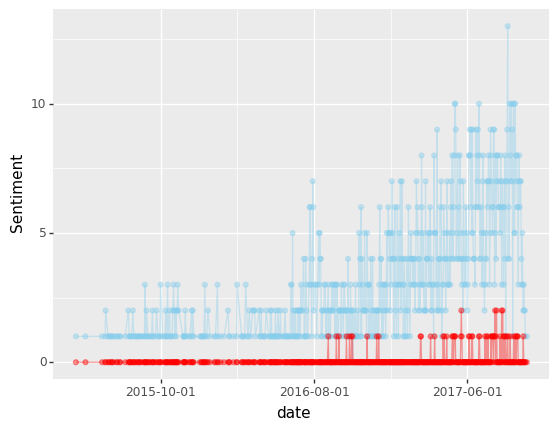

<ggplot: (-9223371953713723340)>

In [15]:
pol_df = pd.DataFrame({'date' : date_lst,
                      'Positive' : pos_lst,
                      'Negative' : neg_lst})
pol_df.head()

print(pol_df)

print(pol_df.values.tolist())
(
    ggplot(pol_df)
    + geom_point(aes(x='date', y='Positive'),color='skyblue',alpha=0.4)
    + geom_line(aes(x='date', y='Positive'),color='skyblue',alpha=0.4,group=1)
    + geom_point(aes(x='date', y='Negative'),color='red',alpha=0.4)
    + geom_line(aes(x='date', y='Negative'),color='red',alpha=0.4,group=2)
    + scale_x_datetime(breaks=date_breaks('10 month'))
    + geom_smooth(aes(x='date', y='Positive'),color='blue')
    + xlab('date')
    + ylab('Sentiment')
)

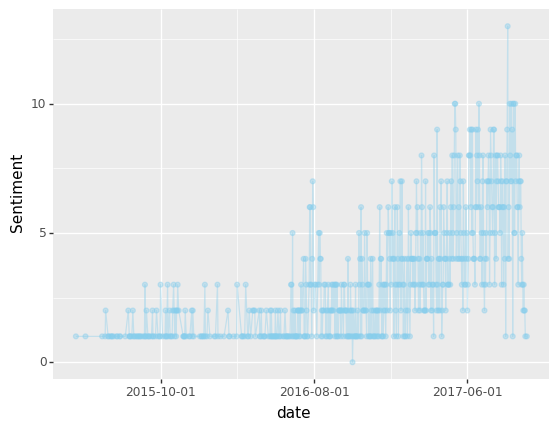

<ggplot: (-9223371953704676428)>


In [19]:
pos_graph = (
    ggplot(pol_df,aes(x='date', y='Positive'))
    + geom_point(color='skyblue',alpha=0.4)
    + geom_line(color='skyblue',alpha=0.4,group=1)
    + scale_x_datetime(breaks=date_breaks('10 month'))
    + geom_smooth(color='blue',method='lm',se=False)
    + xlab('date')
    + ylab('Sentiment')
)

neg_graph = (
    ggplot(pol_df,aes(x='date', y='Negative'))
    + geom_point(color='red',alpha=0.4)
    + geom_line(color='red',alpha=0.4,group=1)
    + scale_x_datetime(breaks=date_breaks('10 month'))
    + geom_smooth(color='red',method='lm',se=False)
    + xlab('date')
    + ylab('Sentiment')
)
print(pos_graph)

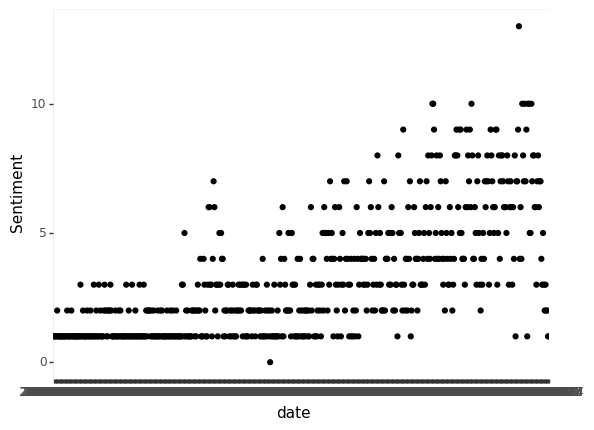

<ggplot: (-9223371953713652272)>

In [8]:
(
    ggplot(pol_df, aes(x='date', y='Positive'))
    + geom_point()
    + geom_smooth()
    + xlab('date')
    + ylab('Sentiment')
)

In [ ]:
##이중리스트 csv로 변환 

with open(r'E:\Programming\python\창회선배스터디\SSAbasedTrend\result.csv','w',newline='') as f:
    makewrite = csv.writer(f)
    for val in pol_lst:
        makewrite.writerow(val)